In [ ]:
#importing basic libraries
 
import pandas as pd
import numpy as np
import seaborn as sns
import nltk 
import re
import matplotlib.pyplot as plt
nltk.download("wordnet")
nltk.download("stopwords")
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
#Reading files
real_news=pd.read_excel("/content/Real_News.xlsx")
fake_news=pd.read_excel("/content/Fake_News.xlsx")

In [ ]:
#Checking out null values and shape of the dataset
print(real_news.isnull().sum())
print(fake_news.isnull().sum())
print(real_news.shape)
print(fake_news.shape)
print(real_news.columns)
print(fake_news.columns)

Title        0
News_text    0
Subject      0
dtype: int64
Title        0
News_text    0
Subject      0
dtype: int64
(21755, 3)
(23697, 3)
Index(['Title', 'News_text', 'Subject'], dtype='object')
Index(['Title', 'News_text', 'Subject'], dtype='object')


In [ ]:
#Adding on the label 1 = True & 0 = Fake
real_news["type"]=1
fake_news["type"]=0

In [ ]:
#Now just concatenating both the dataset
news=pd.concat([real_news,fake_news], axis=0,join="inner",ignore_index=True)
news

,Title,News_text,Subject,type
0,Trump judicial nominee withdraws from consider...,WASHINGTON (Reuters) - A lawyer nominated by P...,politicsNews,1
1,No. 2 Democrat in Senate calls on Franken to r...,"(Reuters) - U.S. Senator Dick Durbin, the No. ...",politicsNews,1
2,"WTO chief won't debate Trump, but rallies supp...",GENEVA (Reuters) - The head of the World Trade...,politicsNews,1
3,Hungary says it is facing 'frontal assault' fr...,BUDAPEST (Reuters) - Hungary is facing a front...,worldnews,1
4,Senate Republicans shove tax bill ahead as Dem...,WASHINGTON (Reuters) - U.S. Senate Republicans...,politicsNews,1
...,...,...,...,...
45447,CLOAKED ORDER: Whoâ€™s Really Behind â€˜New Au...,"21st Century Wire says Earlier this week, the ...",Middle-east,0
45448,Bill Maher Gets His Swagger On Over Liberal C...,Bill Maher finished Friday s episode of Real T...,News,0
45449,WHOA! BLACK WOMAN FED UP WITH BLACK RACISTS NA...,WOW This woman absolutely nails it!,politics,0
45450,"State Dept. Releases 7,000 Clinton E-mails But...","The State Department released 7,000 Clinton e-...",politics,0


In [ ]:
#Checking out the unique values in Subject 
 
print(news["Subject"].unique())
news["News_text"].drop_duplicates
news.isnull().sum()

['politicsNews' 'worldnews' 'News' 'PoliticalFact' 'left-news' 'politics'
 'Government News' 'Middle-east' 'US_News']


Title        0
News_text    0
Subject      0
type         0
dtype: int64

In [ ]:
pie=news.Subject.value_counts()
pie

politicsNews       11363
worldnews          10145
News                9306
politics            6838
left-news           4457
Government News     1570
US_News              775
Middle-east          770
PoliticalFact        228
Name: Subject, dtype: int64

([<matplotlib.patches.Wedge at 0x7f1ae4a7d210>,
 [Text(0.7778174593052024, 0.7778174593052023, 'politicsNews'),
  Text(-0.7096580547736265, 0.8404673969256111, 'worldnews'),
  Text(-0.9782990174437407, -0.5029224915119742, 'News'),
  Text(0.021895343189746834, -1.0997820665689195, 'politics'),
  Text(0.789554620637593, -0.7659004511226161, 'left-news'),
  Text(1.0319406779223832, -0.38091788780404146, 'Government News'),
  Text(1.079885839361325, -0.20939573526432367, 'US_News'),
  Text(1.096052897282472, -0.093102343465131, 'Middle-east'),
  Text(1.099863408987248, -0.017334404257122533, 'PoliticalFact')])

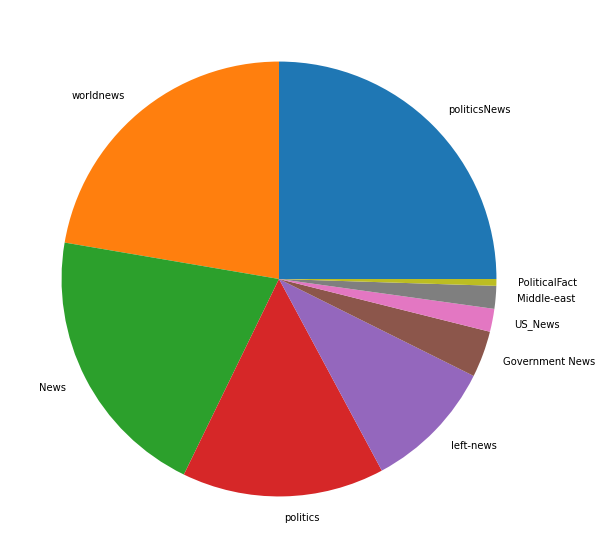

In [ ]:
plt.figure(figsize=(20,10))
plt.pie(pie, labels=pie.index,)

In [ ]:
#Replacing the values from the Subject column
news["Subject"].replace(to_replace="politicsNews",value="politics",inplace=True )
news["Subject"].replace(to_replace="PoliticalFact",value="politics",inplace=True )
print(news["Subject"].unique())

['politics' 'worldnews' 'News' 'left-news' 'Government News' 'Middle-east'
 'US_News']


In [ ]:
#Now lets Merge Title & News_Text as a single column 
news["Main"]=news["Title"].str.cat(news["News_text"], sep=" ")
news

,Title,News_text,Subject,type,Main
0,Trump judicial nominee withdraws from consider...,WASHINGTON (Reuters) - A lawyer nominated by P...,politics,1,Trump judicial nominee withdraws from consider...
1,No. 2 Democrat in Senate calls on Franken to r...,"(Reuters) - U.S. Senator Dick Durbin, the No. ...",politics,1,No. 2 Democrat in Senate calls on Franken to r...
2,"WTO chief won't debate Trump, but rallies supp...",GENEVA (Reuters) - The head of the World Trade...,politics,1,"WTO chief won't debate Trump, but rallies supp..."
3,Hungary says it is facing 'frontal assault' fr...,BUDAPEST (Reuters) - Hungary is facing a front...,worldnews,1,Hungary says it is facing 'frontal assault' fr...
4,Senate Republicans shove tax bill ahead as Dem...,WASHINGTON (Reuters) - U.S. Senate Republicans...,politics,1,Senate Republicans shove tax bill ahead as Dem...
...,...,...,...,...,...
45447,CLOAKED ORDER: Whoâ€™s Really Behind â€˜New Au...,"21st Century Wire says Earlier this week, the ...",Middle-east,0,CLOAKED ORDER: Whoâ€™s Really Behind â€˜New Au...
45448,Bill Maher Gets His Swagger On Over Liberal C...,Bill Maher finished Friday s episode of Real T...,News,0,Bill Maher Gets His Swagger On Over Liberal C...
45449,WHOA! BLACK WOMAN FED UP WITH BLACK RACISTS NA...,WOW This woman absolutely nails it!,politics,0,WHOA! BLACK WOMAN FED UP WITH BLACK RACISTS NA...
45450,"State Dept. Releases 7,000 Clinton E-mails But...","The State Department released 7,000 Clinton e-...",politics,0,"State Dept. Releases 7,000 Clinton E-mails But..."


In [ ]:
#Updating dataset by using those columns only which are most important i.e Type Main & Subject
news=news[["Main","Subject","type"]]
news

,Main,Subject,type
0,Trump judicial nominee withdraws from consider...,politics,1
1,No. 2 Democrat in Senate calls on Franken to r...,politics,1
2,"WTO chief won't debate Trump, but rallies supp...",politics,1
3,Hungary says it is facing 'frontal assault' fr...,worldnews,1
4,Senate Republicans shove tax bill ahead as Dem...,politics,1
...,...,...,...
45447,CLOAKED ORDER: Whoâ€™s Really Behind â€˜New Au...,Middle-east,0
45448,Bill Maher Gets His Swagger On Over Liberal C...,News,0
45449,WHOA! BLACK WOMAN FED UP WITH BLACK RACISTS NA...,politics,0
45450,"State Dept. Releases 7,000 Clinton E-mails But...",politics,0


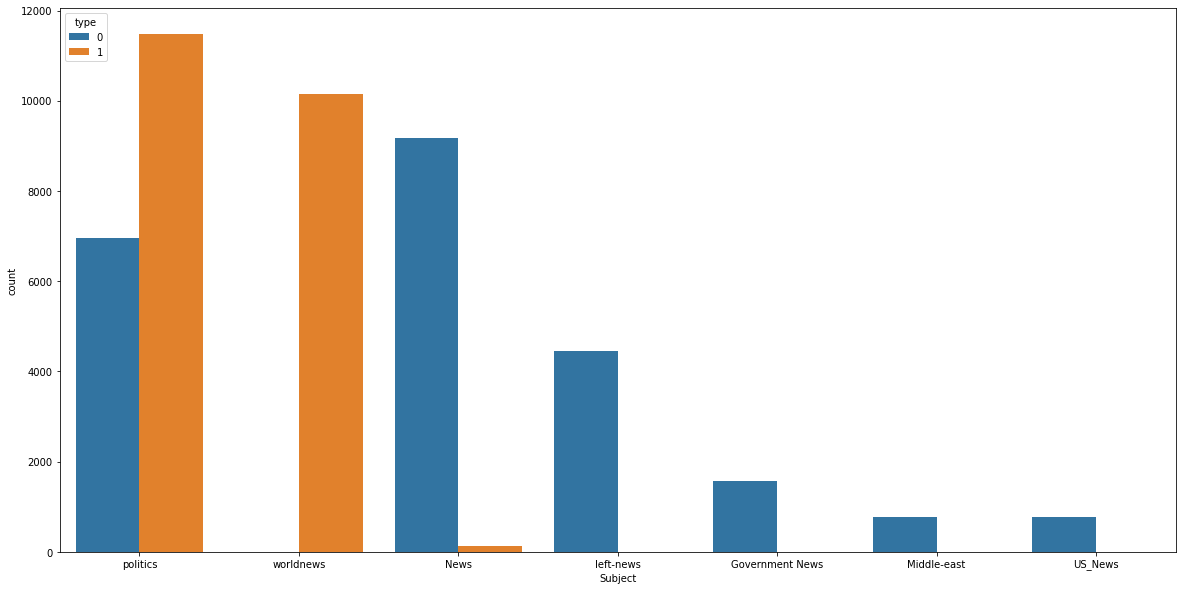

In [ ]:

#Representing the Subject Values on the basis of fake and real
 
plt.figure(figsize=(20,10))
sns.countplot(x=news["Subject"],hue=news["type"])

In [ ]:
#Reading dataset file in which preprocessing had already done (stemmed,Lower and removing special characters)
 
data=pd.read_excel("PreProcessedData.xlsx")
print(data.shape)
print(data.columns)

(45452, 4)
Index(['Unnamed: 0', 'Unnamed: 0.1', 'main', 'type'], dtype='object')


In [ ]:
#Removing the data Unnamed: 0 Column from the avove data
#data=data.drop(columns="Unnamed: 0",axis=1)
data

,Unnamed: 0,Unnamed: 0.1,main,type
0,0,0,trump judici nomine withdraw consider washingt...,1
1,1,1,no. democrat senat call franken resign reuter ...,1
2,2,2,wto chief debat trump ralli support trade gene...,1
3,3,3,hungari say face frontal assault u.s. financi ...,1
4,4,4,senat republican shove tax bill ahead democrat...,1
...,...,...,...,...
45447,45447,45447,cloak order realli behind new author cia drone...,0
45448,45448,45448,bill maher get swagger liber california crush ...,0
45449,45449,45449,whoa black woman fed black racist nail mani bl...,0
45450,45450,45450,state dept. releas clinton e mail white hous r...,0


In [ ]:
!pip install pyspellchecker
from spellchecker import SpellChecker

spell=SpellChecker()

In [ ]:
#now correcting the spellings of the main columns
''' def fun(x):
  correctedword=[]
  List=x.split()
  for i in List:
    correct=spell.correction(i)
    a=correct
    correctedword.append(a)
  return " ".join(correctedword)

   
data["main"]=data["main"].apply(lambda x: fun(x))
data["main"] '''

' def fun(x):\n  correctedword=[]\n  List=x.split()\n  for i in List:\n    correct=spell.correction(i)\n    a=correct\n    correctedword.append(a)\n  return " ".join(correctedword)\n\n   \ndata["main"]=data["main"].apply(lambda x: fun(x))\ndata["main"] '

In [ ]:
#Defining corpus for TFIDF
corpus=[]
for i in data["main"]:
  corpus.append(i)

len(corpus)
print(corpus)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
#here we will make the 2 list of words one will be for Fake news & another one will be for Real news
words_real=[]
for j in range(len(data.iloc[0:21755,0:1])):
  a=data["main"][j].split()
  for k in a:
    words_real.append(k)
len(words_real)

5259472

In [ ]:
words_fake=[]
for l in range(len(data.iloc[21755:,0:1])):
  b=data["main"][l].split()
  for m in b:
    words_fake.append(m)
len(words_fake)

5734869

In [ ]:
from collections import Counter
Freq_fake=Counter(words_real).most_common(100)
Freq_fake

[('said', 78530),
 ('trump', 60539),
 ('u.s.', 45267),
 ('state', 35850),
 ('would', 32456),
 ('presid', 30165),
 ('reuter', 27321),
 ('republican', 24091),
 ('said.', 21971),
 ('.', 21341),
 ('govern', 19922),
 ('year', 19502),
 ('say', 18777),
 ('hous', 18396),
 ('new', 18377),
 ('democrat', 16975),
 ('unit', 16776),
 ('senat', 16577),
 ('also', 16354),
 ('elect', 15776),
 ('parti', 15044),
 ('peopl', 14931),
 ('offici', 14863),
 ('told', 14551),
 ('nation', 14385),
 ('could', 14251),
 ('one', 14158),
 ('last', 13330),
 ('two', 13143),
 ('call', 13092),
 ('washington', 12728),
 ('countri', 12572),
 ('includ', 12390),
 ('support', 12207),
 ('report', 11768),
 ('vote', 11738),
 ('secur', 11523),
 ('campaign', 11501),
 ('former', 11102),
 ('donald', 10927),
 ('north', 10827),
 ('leader', 10812),
 ('court', 10622),
 ('clinton', 10617),
 ('white', 10597),
 ('group', 10596),
 ('tax', 10141),
 ('obama', 10114),
 ('polit', 9942),
 ('plan', 9895),
 ('minist', 9833),
 ('time', 9661),
 ('right'

In [ ]:
#here we are checking out the words which came more often in complete Corpus by using the function Counter
Freq_real=Counter(words_fake).most_common(100)
Freq_real

[('said', 80787),
 ('trump', 67087),
 ('u.s.', 46008),
 ('state', 37805),
 ('would', 34377),
 ('presid', 32536),
 ('reuter', 27364),
 ('republican', 25431),
 ('.', 22643),
 ('said.', 22330),
 ('year', 20846),
 ('govern', 20727),
 ('say', 20495),
 ('new', 19720),
 ('hous', 19418),
 ('democrat', 18030),
 ('also', 17559),
 ('unit', 17514),
 ('senat', 17256),
 ('peopl', 16995),
 ('elect', 16707),
 ('one', 16228),
 ('parti', 15719),
 ('nation', 15424),
 ('offici', 15382),
 ('told', 15280),
 ('could', 15058),
 ('call', 14364),
 ('last', 14026),
 ('two', 13852),
 ('countri', 13365),
 ('support', 13307),
 ('washington', 13205),
 ('report', 12976),
 ('includ', 12970),
 ('vote', 12524),
 ('donald', 12411),
 ('clinton', 12376),
 ('campaign', 12296),
 ('secur', 12004),
 ('white', 11856),
 ('obama', 11829),
 ('former', 11693),
 ('group', 11217),
 ('court', 11176),
 ('leader', 11170),
 ('time', 11076),
 ('north', 11066),
 ('polit', 10803),
 ('right', 10538),
 ('tax', 10500),
 ('like', 10410),
 ('mak

In [ ]:
#Now we are installinhg wordcloud
!pip install wordcloud

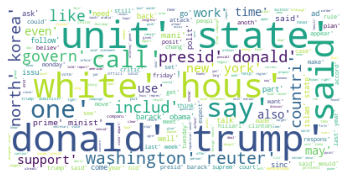

In [ ]:

from wordcloud import WordCloud , STOPWORDS
#For Fake News
Chart=WordCloud(background_color="white",stopwords=set(STOPWORDS)).generate(str(words_fake))
Chart
plt.axis("off")
plt.imshow(Chart)

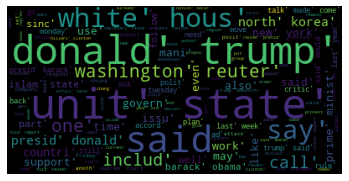

In [ ]:
from wordcloud import WordCloud , STOPWORDS
#For Real News
Chart2=WordCloud(stopwords=set(STOPWORDS)).generate(str(words_real))
plt.axis("off")
plt.imshow(Chart2)

In [ ]:
#Now We will Use TFIDF Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


In [ ]:
#Fitting the corpus in TFIDF 
tfidf_v=TfidfVectorizer(max_features=5000,ngram_range=(1,3),stop_words="english")
ready=tfidf_v.fit(corpus)
ready

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=5000,
                min_df=1, ngram_range=(1, 3), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words='english', strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [ ]:
#Saving the TFIDF file for Deployment pupose
import pickle
with open("tfidf.pkl","wb") as file:
  pickle.dump(ready,file)


In [ ]:
#Transforming the main column from the DATA dataset.
feature=ready.get_feature_names()
print(feature)
datavalues=ready.transform(data["main"]).toarray()
datavalues.shape
datavalues


['abadi', 'abandon', 'abba', 'abc', 'abc news', 'abdullah', 'abe', 'abedin', 'abid', 'abil', 'abl', 'abort', 'abroad', 'absolut', 'absurd', 'abu', 'abus', 'academ', 'acceler', 'accept', 'access', 'accid', 'accident', 'accommod', 'accompani', 'accomplish', 'accord', 'accord new', 'accord report', 'accord reuter', 'account', 'accur', 'accus', 'achiev', 'acknowledg', 'aclu', 'acquir', 'acr', 'act', 'act like', 'action', 'actions', 'activ', 'activist', 'actor', 'actress', 'actual', 'ad', 'adam', 'add', 'added', 'addict', 'addit', 'address', 'adjust', 'administr', 'administr offici', 'administration', 'admir', 'admiss', 'admit', 'adopt', 'adult', 'advanc', 'advantag', 'advertis', 'advic', 'advis', 'advisor', 'advisori', 'advoc', 'advocaci', 'advocaci group', 'afd', 'affair', 'affect', 'affili', 'affirm', 'afford', 'afford care', 'afford care act', 'afghan', 'afghanistan', 'afraid', 'africa', 'african', 'african american', 'aft', 'aftermath', 'afternoon', 'afterward', 'ag', 'age', 'agenc', '

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
#Creating the Dataframe

NewsVector=pd.DataFrame(datavalues,columns=feature)
NewsVector
NewsVector["class"]=data["type"]  
NewsVector

,abadi,abandon,abba,abc,abc news,abdullah,abe,abedin,abid,abil,abl,abort,abroad,absolut,absurd,abu,abus,academ,acceler,accept,access,accid,accident,accommod,accompani,accomplish,accord,accord new,accord report,accord reuter,account,accur,accus,achiev,acknowledg,aclu,acquir,acr,act,act like,...,xi,xi jinp,yahoo,yate,ye,yeah,year,year ago,year later,year old,year prison,year said,years,yell,yemen,yesterday,yield,york,york citi,york reuter,york time,york time report,young,young peopl,younger,youth,youtu,youtub,youtube,youtube com,youtube com watch,ypg,yr,zealand,zero,zika,zimbabw,zone,zor,zuma
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.044892,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.094362,0.0,0.0,0.043268,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.026559,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.012516,0.0,0.0,0.000000,0.000000,0.0,0.051465,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.025571,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45447,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.023455,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.032802,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.013477,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.040568,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
45448,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.074451,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.056005,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.090248,0.092336,0.102171,0.102417,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
45449,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.147060,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0

In [ ]:
#Now Introducing the class that is whether the news is Fake or real
#Divide the dataset into Train and Test
X=datavalues
y=NewsVector["class"].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((30452, 5000), (15000, 5000), (30452,), (15000,))

In [ ]:
#Building Model using NaiveBayes

from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
Naivebayes=MultinomialNB()
model=Naivebayes.fit(X_train,y_train)
pred=model.predict(X_test)

#Measuring the accuracy of the model
print(metrics.classification_report(y_test,pred))
print(metrics.confusion_matrix(y_test,pred))


              precision    recall  f1-score   support

           0       0.95      0.95      0.95      7837
           1       0.95      0.94      0.94      7163

    accuracy                           0.95     15000
   macro avg       0.95      0.95      0.95     15000
weighted avg       0.95      0.95      0.95     15000

[[7446  391]
 [ 421 6742]]


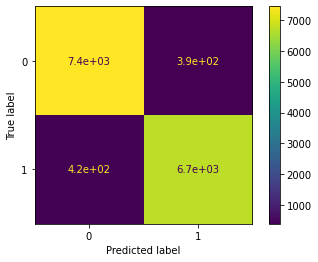

In [ ]:
#Building Confusion Matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model,X_test,y_test)

In [ ]:
#Logistic Regression 
from sklearn.linear_model import LogisticRegression
Log = LogisticRegression(penalty="l2" ) #<----------- Pennalizing it to avoid overfitting
model2=Log.fit(X_train,y_train)
predict2=model2.predict(X_test)
print(metrics.classification_report(y_test,predict2))
print(metrics.confusion_matrix(y_test,predict2))



              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7837
           1       0.99      0.99      0.99      7163

    accuracy                           0.99     15000
   macro avg       0.99      0.99      0.99     15000
weighted avg       0.99      0.99      0.99     15000

[[7740   97]
 [ 106 7057]]


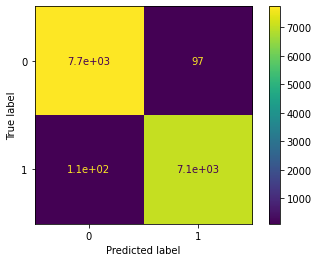

In [ ]:
plot_confusion_matrix(model2,X_test,y_test)

In [ ]:
#KNN

from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier(n_neighbors=4)
model3=KNN.fit(X_train,y_train)
predict3=model3.predict(X_test)
print(metrics.classification_report(y_test,predict3))
print(metrics.confusion_matrix(y_test,predict3))  


In [ ]:
plot_confusion_matrix(model3,X_test,y_test)